<div style="text-align:center; border:2px solid blue; color:MediumPurple; font-size: 1.8em;">
<h1>Atelier de présentation de l'EDS NSI</h1>
    <br>
</div>

<img src="Dico2.jpg" width=95%>

<div style="text-align:center; font-size: 1.8em;">
<h1>1 mot ------------ > 1 définition</h1>  
</div>

<div style="text-align:center; font-size: 1.8em;">
<h1>1 mot ------------ > sa traduction</h1>  
</div>

<img src="Dico_Python.jpg" width=95%>

<img src="Famille_Simpson.jpg" width=95%>

In [3]:
Famille_Simpson = {'père':'Homer','mère':'Marge','fils':'Bart','fille':'Lisa','bébé':'Maggie','grand-père':'Grand-père'}
# Dans la famille Simpson, je demande : le père..
print(Famille_Simpson['fils'])

Bart


<img src="Famille_Simpson.jpg" width=95%>

In [4]:
Famille_Simpson = {'père':'Homer','mère':'Marge','fils':'Bart','fille':'Lisa','bébé':'Maggie','grand-père':'Grand-père'}
# Dans la famille Simpson, je demande : LES ENFANTS ?..la clé existe ?

Famille_Simpson2 = {'père':'Homer','mère':'Marge','les enfants':['Bart','Lisa','Maggie'],'fils':'Bart','fille':'Lisa','bébé':'Maggie','grand-père':'Grand-père'}
print(Famille_Simpson2['les enfants'])

['Bart', 'Lisa', 'Maggie']


In [5]:
import matplotlib.image as img
import matplotlib.pyplot as plt
Famille_Simpson2 = {'père':'Homer','mère':'Marge','les enfants':['Bart','Lisa','Maggie'],'fils':'Bart','fille':'Lisa','bébé':'Maggie','grand-père':'Grand-père'}
def je_demande(famille,personnage):
    if famille == Famille_Simpson2:
            adresse = personnage + ".jpg"
            dessin = img.imread(adresse)  
            plt.title(personnage)
            plt.imshow(dessin)
            plt.rcParams["figure.figsize"] = 4,4
            plt.axis('off')
    else:
        for clé,valeur in famille.items():
            if clé == personnage:
                adresse = valeur + ".jpg"
                dessin = img.imread(adresse)  
                plt.title(valeur)
                plt.imshow(dessin)
                plt.rcParams["figure.figsize"] = 2,2
                plt.axis('off')

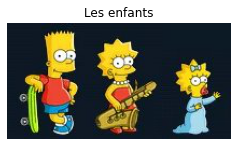

In [9]:
je_demande(Famille_Simpson2,'les enfants')

<img src='Dico_Python_FranGlais.jpg'>

In [11]:
Dico_Fran_Ang = {'Bonjour':'hello', 'école':'school','voiture':'car','fleur':'flower','chien':'dog'}
# On peut demander une traduction du français vers l'anglais ..
print(Dico_Fran_Ang['école'])

school


## Ce serait bien, si on pouvait avoir le dictionnaire dans l'autre sens..

In [13]:
Dico_Fran_Ang = {'Bonjour':'hello', 'école':'school','voiture':'car','fleur':'flower','chien':'dog'}
# inversons ce dictionnaire..
Dico_Ang_Fran ={valeur:cle for (cle,valeur) in Dico_Fran_Ang.items()}
print(Dico_Ang_Fran)

{'hello': 'Bonjour', 'school': 'école', 'car': 'voiture', 'flower': 'fleur', 'dog': 'chien'}


## Ce serait encore mieux, si on n'étais pas obligé d'écrire ...!

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 10 14:13:05 2022

@author: dfial
"""
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write ## enregistrer des fichiers WAV à partir de données
import wavio as wv 
import speech_recognition as sr  ## module de reconnaissance verbale API Google (internet branché)
####
import pyttsx3  ## pour parler
#####   Demmarage du moteur de paraole  ######
engine = pyttsx3.init()
# Set properties _before_ you add things to say
engine.setProperty('rate', 150)    # Speed percent (can go over 100)
engine.setProperty('volume', 0.9)  # Volume 0-1
#########################################################
def parle(phrase):
    engine.say(phrase)
    engine.runAndWait()
#############################################
def enregistre():
    yepi="Je vous écoute"
    engine.say(yepi)
    engine.runAndWait()
    freq = 44100
    duration = 3
    recording = sd.rec(int(duration * freq), 
    				samplerate=freq, channels=2) 
    sd.wait() 
    wv.write("recording1.wav", recording, freq, sampwidth=2)     
##############
def reconn():
    r = sr.Recognizer()
    audio = sr.AudioFile('recording1.wav')
    with audio as source:
        r.adjust_for_ambient_noise(source, duration=0.5)
        audio_file = r.record(source)
    try: 
        result = r.recognize_google(audio_file, language="fr-FR")
        print("resultat = ", result)
        return result
    except sr.UnknownValueError:
        print("Désolé.. j'ai mal entendu.")
#########################
Dico_Fran_Ang = {'Bonjour':'hello', 'école':'school','voiture':'car','fleur':'flower','chien':'dog','valise':'suitcase','Bonjour à tous':'hello everybody','oridnateur':'computer'}
Dico_Ang_Fran ={valeur:cle for (cle,valeur) in Dico_Fran_Ang.items()}
#################################
while True:
    enregistre()
    resultat = reconn()
    if resultat == 'stop':
        parle('au revoir')
        break
    elif resultat in Dico_Fran_Ang:
        phrase = Dico_Fran_Ang[resultat]
        parle(phrase)
    elif resultat in Dico_Ang_Fran:
        phrase = Dico_Ang_Fran[resultat]
        parle(phrase)
    else:
        print("Je ne connais pas ce mot.")


resultat =  Bonjour
resultat =  fleur
resultat =  flower
resultat =  Hello
Je ne connais pas ce mot.
resultat =  Hello
Je ne connais pas ce mot.
resultat =  fleur
resultat =  chien
Désolé.. j'ai mal entendu.
Je ne connais pas ce mot.
resultat =  dog
resultat =  stop


## Et si on créais un script qui m'aide à apprendre mes cours ?...

In [15]:
Mon_Cours = {}
Numero_Question = len(Mon_Cours)
print("\nAplication : Enregistrer / interrogé : ")
while True:
    engine.setProperty('rate', 150)    # Speed percent (can go over 100)
    parle("Voulez vous enregistrer votre cours, ou être interrogé ?")
    enregistre()
    resultat = reconn()
    if resultat == 'stop':
        parle('au revoir')
        break
    elif resultat == 'enregistrer':
        print("\nEnregistrement :")
        while True:
            Numero_Question = Numero_Question + 1
            phrase = "question" + str(Numero_Question)
            parle(phrase)
            enregistre()
            resultat1 = reconn()
            if resultat1 == 'stop':
                parle("fin d'enregistrement du cours.")
                break            
            print("\nLa question ",Numero_Question," : ",resultat1)
            phrase = "réponse" + str(Numero_Question)
            parle(phrase)
            enregistre()
            resultat2 = reconn()
            if resultat2 == 'stop':
                parle("fin d'enregistrement du cours.")
                break              
            print("La réponse ",Numero_Question," : ",resultat2)
            Mon_Cours[resultat1]=resultat2
            print("\nMon_Cours: ",Mon_Cours )
    elif resultat == 'interroger':
        print("\nInterrogation :")
        Liste_Questions = [ question for question in Mon_Cours.keys()]
        Nombre_de_question = len(Liste_Questions)
        Numero_Question = 0
        while Numero_Question < Nombre_de_question:
            phrase = "question" + ". " + str(Numero_Question+1)
            print("\n",phrase)
            parle(phrase)
            phrase = Liste_Questions[Numero_Question]
            print(phrase)
            parle(phrase)
            enregistre()
            resultat = reconn() 
            if resultat == 'stop':
                parle("fin de l'intérrogation.")
                break 
            elif resultat == Mon_Cours[phrase]:
                phrase = "Bonne réponse !"
                print(phrase)
                parle(phrase)
                Numero_Question = Numero_Question + 1
            else:
                phrase = "Mauvaise réponse !"
                print(phrase)
                parle(phrase)
                Numero_Question = Numero_Question + 1            


Aplication : Enregistrer / interrogé : 
resultat =  enregistrer

Enregistrement :
resultat =  chute du mur de Berlin

La question  1  :  chute du mur de Berlin
resultat =  1989
La réponse  1  :  1989

Mon_Cours:  {'chute du mur de Berlin': '1989'}
resultat =  Révolution française

La question  2  :  Révolution française
resultat =  1789
La réponse  2  :  1789

Mon_Cours:  {'chute du mur de Berlin': '1989', 'Révolution française': '1789'}
resultat =  premier pas sur la Lune

La question  3  :  premier pas sur la Lune
resultat =  1969
La réponse  3  :  1969

Mon_Cours:  {'chute du mur de Berlin': '1989', 'Révolution française': '1789', 'premier pas sur la Lune': '1969'}
resultat =  stop
resultat =  interroger

Interrogation :

 question. 1
chute du mur de Berlin
resultat =  1989
Bonne réponse !

 question. 2
Révolution française
resultat =  1789
Bonne réponse !

 question. 3
premier pas sur la Lune
resultat =  1228
Mauvaise réponse !
resultat =  stop
